### kaggle タイタニック生存者
```
kaggle competitions download -c titanic
```

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

### データの読み込み

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


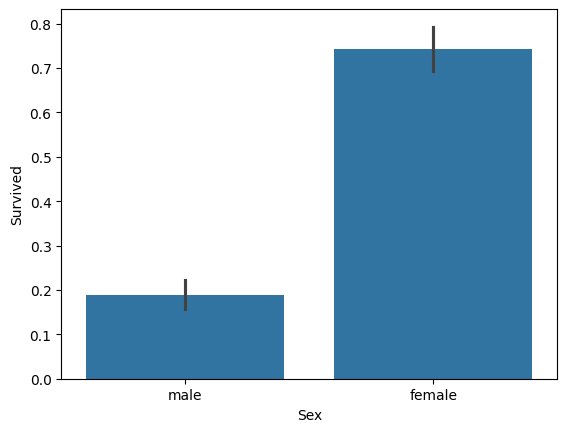

In [ ]:

train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")
train_df.info()
# sns.barplot(x=train_df["Sex"] , y=train_df["Survived"] )
train_df["Age"] = train_df["Age"].fillna(0)
train_df["Cabin"] = train_df["Cabin"].fillna("")
train_df["Embarked"] = train_df["Embarked"].fillna("")






In [51]:
# train_df.value_counts()

all_col_map = {}
target_col_map = {}
train_cols_list = train_df.columns.to_list()
for col in train_cols_list:
    print("----------------------------")
    unique_record = train_df[col].drop_duplicates()
    all_col_map[col] = unique_record.count()
    print(col)
    print(train_df[col].drop_duplicates().count())
    
    if(unique_record.count() < 100):
        target_col_map[col] = unique_record.count()
    
target_col_map.pop("Survived" , None)


----------------------------
PassengerId
891
----------------------------
Survived
2
----------------------------
Pclass
3
----------------------------
Name
891
----------------------------
Sex
2
----------------------------
Age
89
----------------------------
SibSp
7
----------------------------
Parch
7
----------------------------
Ticket
681
----------------------------
Fare
248
----------------------------
Cabin
148
----------------------------
Embarked
4


np.int64(2)

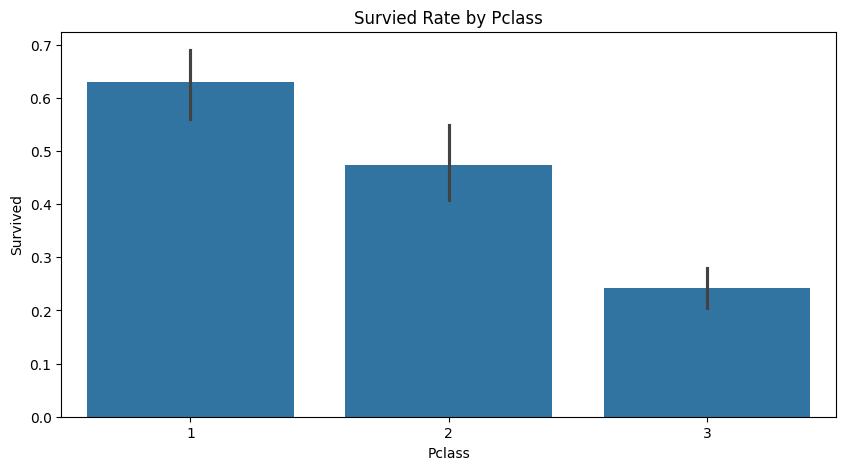

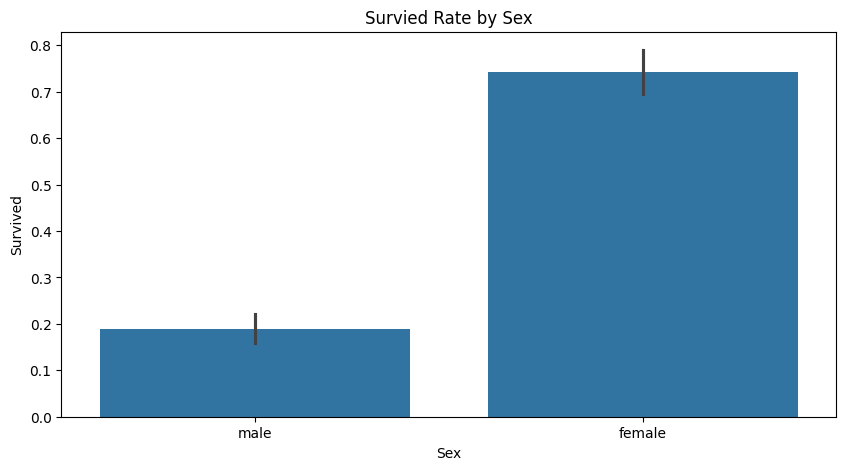

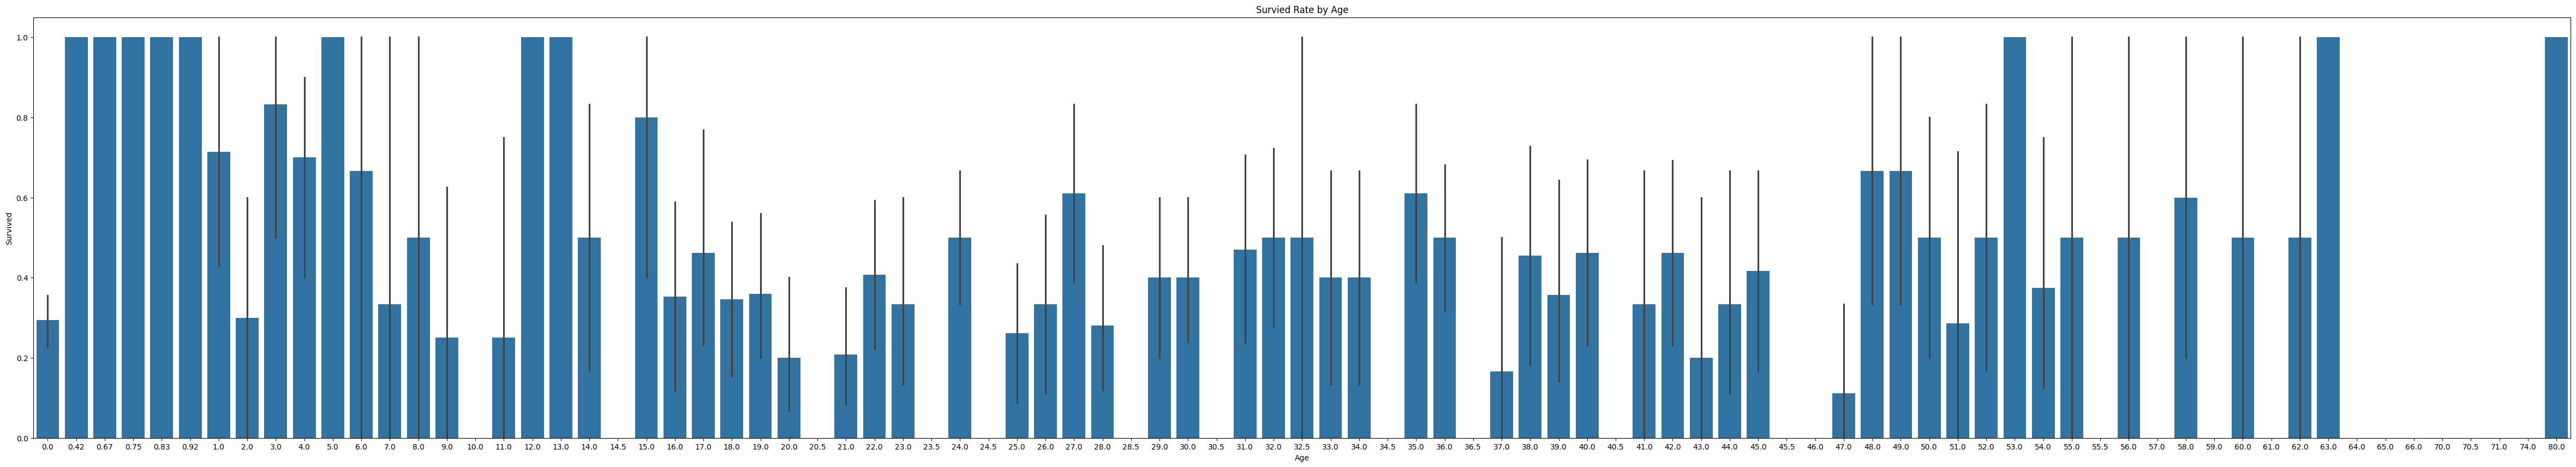

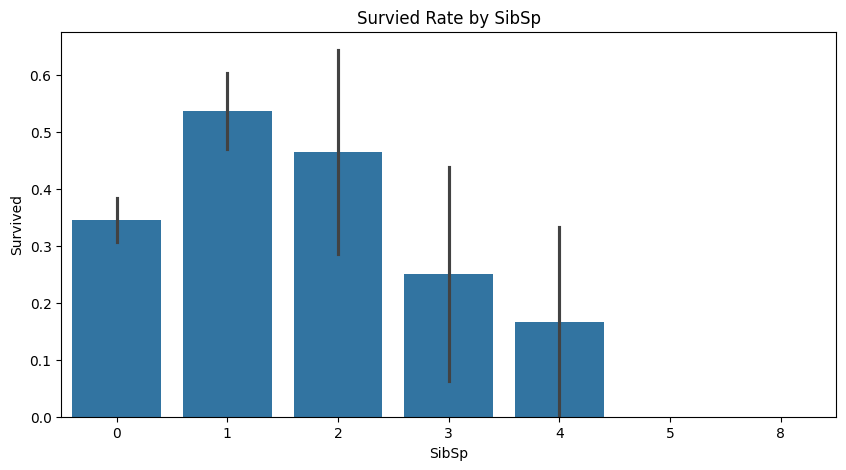

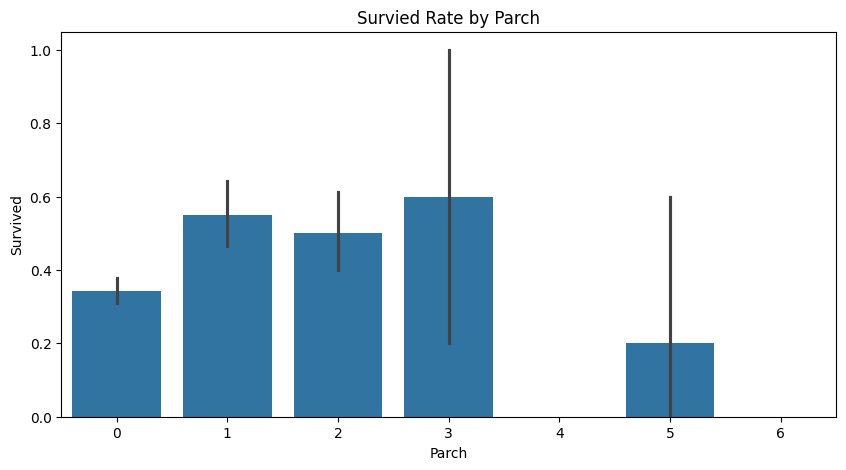

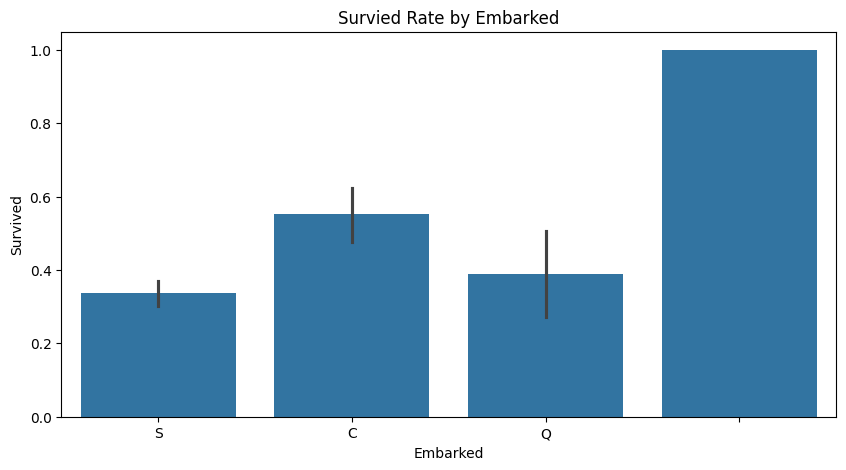

In [ ]:

for target_col in target_col_map.keys():
    
    if len(train_df[target_col].drop_duplicates()) > 30:
        plt.figure(figsize=(60 , 10))
    else:
        plt.figure(figsize=(10,5))
    sns.barplot(x = train_df[target_col].sort_values() , y = train_df["Survived"] )
    plt.title(f"Survied Rate by {target_col}")
    

In [ ]:

dummy_cols_list = list(target_col_map.keys())

def pre_exec(dummy_cols_list : list , dummy_df : pd.DataFrame) -> pd.DataFrame:
    dummy_df = train_df[dummy_cols_list]
    dummy_df = pd.get_dummies(train_df[dummy_cols_list] , drop_first=True)
    dummy_df = dummy_df.replace({True : 1,
                                False : 0})
    dummy_df = dummy_df.rename(columns=
                            {"Sex_male" : "Sex"})
    dummy_df.insert(0 , "intercept" , 1)
    return dummy_df

y = train_df["Survived"]
x = pre_exec(dummy_cols_list=dummy_cols_list , dummy_df=train_df)
md = sm.OLS(y , x)
model = md.fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     68.82
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           1.07e-87
Time:                        00:23:48   Log-Likelihood:                -405.89
No. Observations:                 891   AIC:                             829.8
Df Residuals:                     882   BIC:                             872.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2968      0.276      4.704      0.0

C:\Users\shino\AppData\Local\Temp\ipykernel_12104\1216051528.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_df = dummy_df.replace({True : 1,


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## 予測を行うテストデータの前処理

In [ ]:

predict_x = pre_exec(dummy_cols_list=dummy_cols_list , dummy_df=test_df)
predict_values = model.predict(predict_x)
# しきい値を 0.5 に設定し、0 or 1 に変換
predict_binary = (predict_values >= 0.5).astype(int)

merge_df = pd.concat([test_df["PassengerId"] , predict_binary]  , axis=1)
merge_df = merge_df.rename(columns={0 : "Survived"})
merge_df.sort_values(by="PassengerId")


os.makedirs("./out" , exist_ok=True)

merge_df.to_csv("./out/result.csv", index=False)
merge_df


C:\Users\shino\AppData\Local\Temp\ipykernel_12104\1216051528.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_df = dummy_df.replace({True : 1,


,PassengerId,Survived
0,892.0,0
1,893.0,1
2,894.0,1
3,895.0,1
4,896.0,0
...,...,...
886,NaN,0
887,NaN,1
888,NaN,1
889,NaN,0
